In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data=pd.read_csv('titanic.csv')
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
label=LabelEncoder()
data['Sex']=label.fit_transform(data['Sex'])
data['Embarked']=label.fit_transform(data['Embarked'])
x=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y=data['Survived']

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
optimizers=['adam','sgd','rmsprop','adagrad','adadelta']
results={}

In [5]:
for opt in optimizers:
    model=Sequential([Dense(10,activation='relu',input_shape=(7,)),Dense(1,activation='sigmoid')])
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    s_t=time.time()
    model.fit(x_train,y_train,epochs=15,verbose=0)
    e_t=time.time()
    t_t=e_t-s_t
    y_pred=(model.predict(x_test)>0.5).astype('int32')
    accuracy=accuracy_score(y_test,y_pred)
    results[opt]={'t_t':t_t,'accuracy':accuracy}

6/6 [==============================] - 0s 3ms/step


In [6]:
for opt,res in results.items():
    print(opt)
    print(f"t_t: {res['t_t']:.4f}")
    print(f"accuracy: {res['accuracy']:.4f}")

adam
t_t: 2.9951
accuracy: 0.7207
sgd
t_t: 1.4046
accuracy: 0.6480
rmsprop
t_t: 2.0214
accuracy: 0.6480
adagrad
t_t: 1.7499
accuracy: 0.5866
adadelta
t_t: 1.8743
accuracy: 0.4134


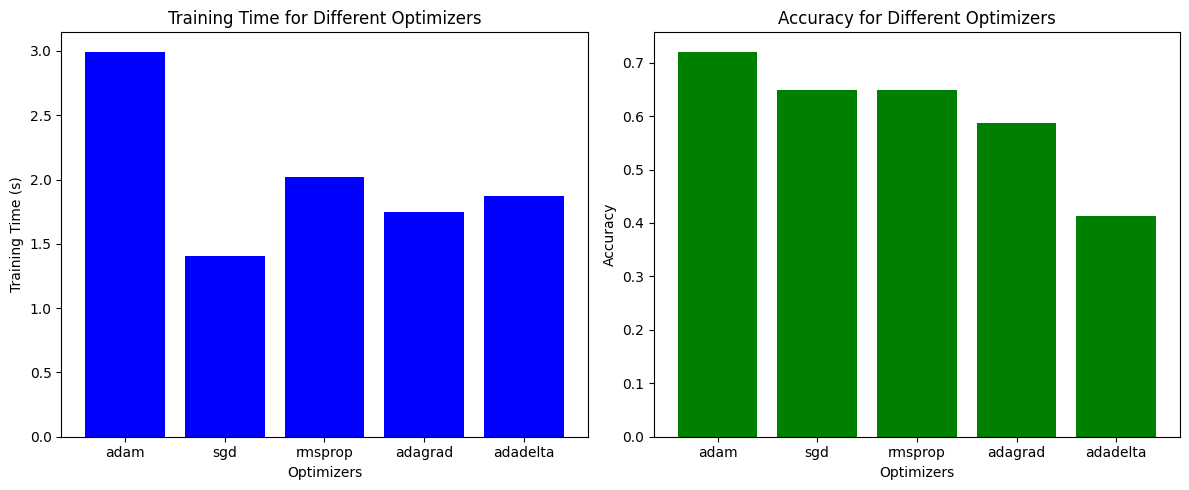

In [10]:
optimizers = list(results.keys())
times = [res['t_t'] for res in results.values()]
accuracies = [res['accuracy'] for res in results.values()]
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(optimizers, times, color='blue')
plt.xlabel('Optimizers')
plt.ylabel('Training Time (s)')
plt.title('Training Time for Different Optimizers')

plt.subplot(1, 2, 2)
plt.bar(optimizers, accuracies, color='green')
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Optimizers')

plt.tight_layout()
plt.show()

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                80        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
